# **CUHK-STAT3009**: Homework 3 - Neural Network in RS: Models, Algorithm, and virtualization (**due Dec 04**)

## **Q1: Data preprocessing**

In [1]:
## use iris dataset in Q1
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)

In [2]:
data

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

### **Q1.1**
- Standardize features by removing the mean and scaling to unit variance.
- Merge `data.data` and `data.target` as a one `dataframe` with columns: [`sepal length (cm)`,	`sepal width (cm)`, `petal length (cm)`, `petal width (cm)`, `target`]
- Compute the target-specific mean of each features, that is,

              sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
      target
      0                   5.006             3.428              1.462             0.246
      1                   5.936             2.770              4.260             1.326
      2                   6.588             2.974              5.552             2.026

In [ ]:
## Your solution to Q1.1 here
# Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_features = scaler.fit_transform(data.data)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
standardized_features_df =  pd.DataFrame(standardized_features, columns = features)
standardized_features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
# Merge as one dataframe
features_target_df = pd.concat([standardized_features_df, data.target], axis = 1)
features_target_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [ ]:
# Compute the target-specific mean of each features
df = pd.concat([data.data, data.target], axis = 1)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

result = []

for i in [0, 1, 2]:
  target = df[df['target'] == i]
  means = target[features].mean().tolist()
  result.append([i] + means)

result_df = pd.DataFrame(result, columns = ['target'] + features)   # change to data frame
result_df

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.006,3.428,1.462,0.246
1,1,5.936,2.770,4.260,1.326
2,2,6.588,2.974,5.552,2.026


### **Q1.2**

- Using `seaborn` to show the `Violinplot` of all features against `target`
- Using `seaborn` to show the `heatmap` of the correlation between all features

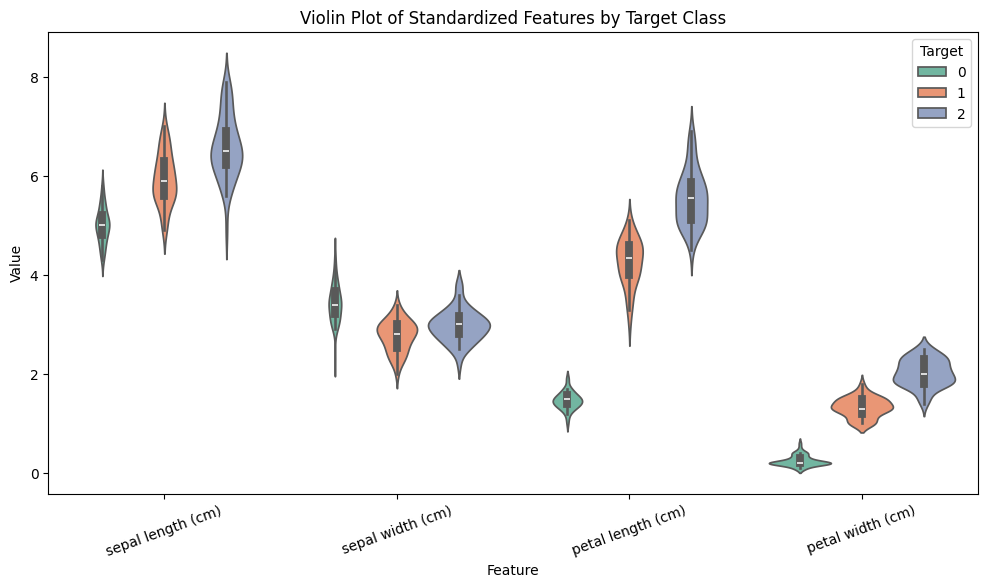

In [ ]:
## Your solution to Q1.2 here
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.concat([data.data, data.target], axis = 1)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# --- Violinplot of all features vs target ---
plt.figure(figsize=(12, 6))
features_melted = df.melt(id_vars='target', value_vars = features, var_name='Feature', value_name='Value')

sns.violinplot(x='Feature', y='Value', hue='target', data=features_melted, palette='Set2')
plt.title('Violin Plot of Standardized Features by Target Class')
plt.xticks(rotation=20)
plt.legend(title='Target')
plt.show()

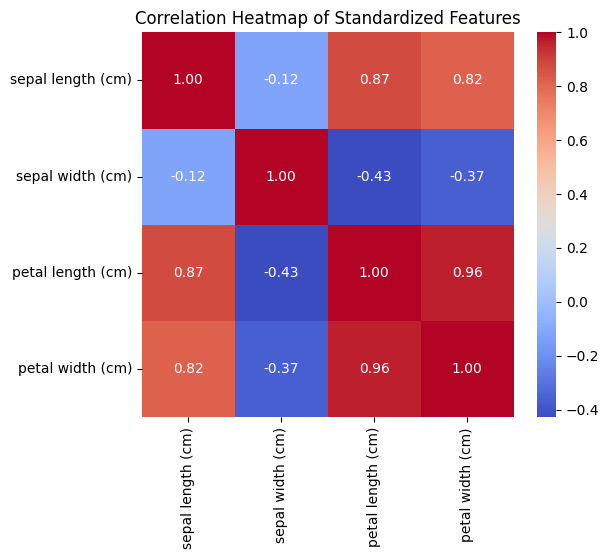

In [ ]:
# --- Heatmap of correlation between all features ---
plt.figure(figsize=(6, 5))
corr_matrix = data.data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Standardized Features')
plt.show()

## **Q2. Semi-parametric model**

A semi-parametric model is widely used in statistical learning, machine learning, and deep learning. Given a feature-vector $\mathbf{x}$, the outcome is formulated as:
$$
f(\mathbf{x}) = \mathbf{\beta}^\intercal \mathbf{x} + h(\mathbf{x}),
$$
where $\mathbf{\beta}$ is a linear coefficient, and $h(\cdot)$ is a nonlinear function. In this question, you are expected to use $f(\mathbf{x})$ to make prediction in `California Housing dataset` based on `tensorflow`

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### **Q2.1**

- Standardize features of by removing the mean and scaling to unit variance.
- Using `tensorflow` build up a network for the model $f(\mathbf{x})$ with $h(\mathbf{x})$ as two `Dense` layers: `Dense(8, activation='relu')` + `Dense(1, activation='linear')`
- Print `model.summary()` for your model

In [4]:
## Your solution to Q2.1 here
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build Network
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

class semi_param(keras.Model):

  def __init__(self):
    super().__init__()
    ## define all layers here
    self.out_beta = Dense(units=1, activation='linear', use_bias = False)
    self.h_dense = Dense(units=8, activation='relu')
    self.out_h = Dense(units=1, activation='linear')

  def call(self, inputs):
    out_beta = self.out_beta(inputs)

    h = self.h_dense(inputs)
    out_h = self.out_h(h)

    return out_beta + out_h

In [ ]:
# Print Model Summary
semi_param().summary()

Model: "semi_param"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### **Q2.2**

- Compile the model with `loss`: [MAE](https://keras.io/api/losses/regression_losses/#meanabsoluteerror-class); `optimizer`: [SGD](https://keras.io/api/optimizers/sgd/); and monitoring `Metrics`: `RMSE`

- fit model
  - using `X_train`, `y_train`
  - taking 20% of data as validation set
  - [earlystopping](https://keras.io/api/callbacks/) based on `RMSE` on `validation set` with custom `patience` and other hyperparamters

- Make prediction to `X_test`, and evaluate the prediction by reporting `RMSE` and `MAE`.

In [ ]:
## Your solution to Q2.2 here

semiParam_model = semi_param()

metrics = [
    keras.metrics.RootMeanSquaredError(name='rmse')
]

semiParam_model.compile(
    optimizer=keras.optimizers.SGD(1e-4),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=metrics
)

## model training
callbacks = [keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]


history = semiParam_model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6391 - rmse: 2.1141 - val_loss: 1.6016 - val_rmse: 2.0192
Epoch 2/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6087 - rmse: 2.1230 - val_loss: 1.5663 - val_rmse: 1.9803
Epoch 3/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5767 - rmse: 2.0210 - val_loss: 1.5314 - val_rmse: 1.9419
Epoch 4/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5200 - rmse: 1.9462 - val_loss: 1.4967 - val_rmse: 1.9039
Epoch 5/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5138 - rmse: 2.1096 - val_loss: 1.4624 - val_rmse: 1.8664
Epoch 6/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4460 - rmse: 1.8764 - val_loss: 1.4284 - val_rmse: 1.8293
Epoch 7/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4165 - rmse: 1.8281 - val_loss: 1.3947 - val_rmse: 1.7926
Epoch 8/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3741 - rmse: 1.7877 - val_loss: 1.3613 - val_rmse: 1.7564
Epoch 9/50
173/173 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
## prediction
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error as mae

y_pred = semiParam_model.predict(X_test).flatten()
print(f'\ny_pred:{y_pred}')
print(f'semiParam | RMSE: {rmse(y_test,y_pred)}')
print(f'semiParam | MAE: {mae(y_test,y_pred)}')

213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

y_pred:[0.461358  0.3227036 1.5233091 ... 1.3633018 1.0565083 1.6945887]
semiParam | RMSE: 1.005687101030847
semiParam | MAE: 0.7435138056839256


## **Q3: Implementing a Custom Recommender System using TensorFlow**

**Recommender System Model:**

The goal of this question is to implement a custom recommender system model using TensorFlow. The model is defined as follows:

$$\widehat{r}_{ui} = \mathbf{p}_u^\intercal \mathbf{q}_i + b_i + \mathbf{p}_u^\intercal \mathbf{p}_u + a_u$$

where:

* $\widehat{r}_{ui}$ is the predicted rating for user $u$ and item $i$
* $\mathbf{p}_u$ is the user latent factor vector
* $\mathbf{q}_i$ is the item latent factor vector
* $b_i$ is the item bias term
* $a_u$ is the user bias term

**Your Task:**

Implement this model using TensorFlow on our course dataset. You will need to:

1. Load the dataset and preprocess the data as needed
2. Define the model architecture using TensorFlow
3. Implement the loss function and optimizer
4. Train the model on the dataset
5. Evaluate the performance of the model using a `Acc`.

**Note:** You can use TensorFlow's built-in functions and modules to implement the model. Note that the prediction result is not of importance; this question only assesses your implementation.

In [ ]:
import numpy as np

def Acc(true_rating, pred_rating):
  return np.mean(true_rating == pred_rating)

In [ ]:
## Dowload binary dataset in CUHK-STAT3009 Github repo
import pandas as pd

train_url = "https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/b-rs/train.csv"
test_url = "https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/b-rs/test.csv"

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

y_train = np.array(train['rating'].values, dtype=float)
X_train = train[['user_id', 'movie_id']].values

y_test = np.array(test['rating'].values, dtype=float)
X_test = test[['user_id', 'movie_id']].values

n_user = max( max(X_train[:,0]), max(X_test[:,0]) ) + 1
n_item = max( max(X_train[:,1]), max(X_test[:,1]) ) + 1

In [ ]:
# standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
## Your solution to Q3 here
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

class custom_RS(keras.Model):
  def __init__(self, num_user, num_item, K=10):
    super().__init__()
    ## layers
    self.user_embed = layers.Embedding(input_dim=num_user,
                                       output_dim=K)
    self.item_embed = layers.Embedding(input_dim=num_item,
                                       output_dim=K)
    self.user_bias = layers.Embedding(input_dim=num_user,
                                       output_dim=1)
    self.item_bias = layers.Embedding(input_dim=num_item,
                                       output_dim=1)
    self.dot = layers.Dot(axes=1) # Specify the axis to sum over

  def call(self, inputs):
    # pu: B x r
    user_vec = self.user_embed(inputs[:,0])
    # qi: B x r
    item_vec = self.item_embed(inputs[:,1])
    # au: user_bias (B x 1)
    user_const = self.user_bias(inputs[:,0])
    # bi: user_bias (B x 1)
    item_const = self.item_bias(inputs[:,1])

    ## pu^T q_i + bi + pu^T p_u + au
    out = self.dot([user_vec, item_vec]) + item_const + self.dot([user_vec, user_vec]) + user_const
    return out


In [ ]:
# Define Model
custom_model = custom_RS(n_user, n_item)

metrics = [
    keras.metrics.RootMeanSquaredError(name='rmse'),
    keras.metrics.MeanAbsoluteError(name='mae')
]

# Compile Model
custom_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=metrics
)

# Train Model
callbacks = [keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]


history = custom_model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,
    epochs=25,
    verbose=1,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/25
640/640 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2898 - mae: 0.5054 - rmse: 0.5359 - val_loss: 0.2450 - val_mae: 0.4901 - val_rmse: 0.4950
Epoch 2/25
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2447 - mae: 0.4890 - rmse: 0.4947 - val_loss: 0.2453 - val_mae: 0.4888 - val_rmse: 0.4953
Epoch 3/25
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2443 - mae: 0.4881 - rmse: 0.4943 - val_loss: 0.2459 - val_mae: 0.4904 - val_rmse: 0.4959
Epoch 4/25
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2445 - mae: 0.4882 - rmse: 0.4945 - val_loss: 0.2455 - val_mae: 0.4868 - val_rmse: 0.4955
Epoch 5/25
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2450 - mae: 0.4888 - rmse: 0.4950 - val_loss: 0.2457 - val_mae: 0.4877 - val_rmse: 0.4957
Epoch 6/25
640/640 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2442 - mae: 0.4879 - rmse: 0.4942 - val_loss: 0.2454 - val_mae: 0.4887 - val_rmse: 0.4953
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


In [ ]:
## prediction
y_pred = custom_model.predict(X_test).flatten()
print(f'\ncustomRS | ACC: {Acc(y_test, (y_pred).astype(int))}')


1599/1599 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

customRS | ACC: 0.42503078516839
